# Анализ скидок мебельного ассортимента по категориям

Цель данного ноутбука попрактиковаться в использовании python с применением библиотек работы с данными и визуализацией pandas и seaborn. Для этого на kaggle был выбран датасет [IKEA Furniture](http://www.kaggle.com/datasets/ahmedkallam/ikea-sa-furniture-web-scraping), в котором представлены товары, их описание, старые и новые цены. 

In [65]:
#Импорт библиотек
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")
import numpy as np
import warnings
import morethemes as mt

Setup Complete


In [66]:
#Скрытие текста ошибок при визуализации и установка кастомной темы с библиотеки morethemes 
warnings.filterwarnings('ignore')
mt.set_theme('minimal')

In [ ]:
#Импорт датасета
df = pd.read_csv(r'C:\Users\Igor\Documents\IKEA_SA_Furniture_Web_Scrapings_sss.csv', index_col=0)

Проверка корректности импорта датасета, типов данных в колонках, количества уникальных значений и количества по категориям мебели. 

In [68]:
df.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [ ]:
#Распределения цен
df['price'].describe()

count    3694.000000
mean     1078.208419
std      1374.652494
min         3.000000
25%       180.900000
50%       544.700000
75%      1429.500000
max      9585.000000
Name: price, dtype: float64

In [ ]:
#Типы данных в колонках
df.dtypes

item_id                int64
name                  object
category              object
price                float64
old_price             object
sellable_online         bool
link                  object
other_colors          object
short_description     object
designer              object
depth                float64
height               float64
width                float64
dtype: object

In [ ]:
#Количество уникальных значений в каждой из колонок 
df.nunique()

item_id              2962
name                  607
category               17
price                 979
old_price             365
sellable_online         2
link                 2962
other_colors            2
short_description    1706
designer              381
depth                 114
height                193
width                 263
dtype: int64

In [ ]:
#Значения по категориям мебели
df['category'].value_counts()

Tables & desks                          612
Bookcases & shelving units              548
Chairs                                  481
Sofas & armchairs                       428
Cabinets & cupboards                    292
Wardrobes                               236
Outdoor furniture                       216
Beds                                    208
TV & media furniture                    190
Chests of drawers & drawer units        125
Children's furniture                    124
Nursery furniture                        97
Bar furniture                            47
Trolleys                                 28
Café furniture                           26
Sideboards, buffets & console tables     23
Room dividers                            13
Name: category, dtype: int64

Для работы с колонкой old_price необходимо преобразовать колонку к типу float, приравнять значения "No old price" к текущим ценам, удалить лишние символы. 
На основании получившейся колонки, можно добавить столбцы с определением есть ли скидка на данный товар и на сколько изменилась цена. 

In [73]:
df['old_price'] = df['old_price'].str.replace('SR ', '')
df['old_price'] = df['old_price'].str.replace(',', '')

In [74]:
#Изменение колонки со старыми ценами в числовой формат
def old_price(df):
    if df['old_price'] == 'No old price':
        return(df['price'])
    elif df['old_price'][-4:] == 'pack':
        return(np.nan)
    else:
        return(float(df['old_price']))
       

In [75]:
df['old_price'] = df.apply(old_price, axis=1)

In [76]:
#Добавление колонки с процентным выражением изменения цены
def price_change(df):
    return((df['price'] / df['old_price'] - 1) * 100)
df['price_change, %'] = df.apply(price_change, axis=1).round(2)

In [77]:
#Добавление колонки с определением есть ли скидка
def discount(df):
    if df['price_change, %'] == 0:
        return('No')
    else:
        return('Yes')
df['discount'] = df.apply(discount, axis=1)

In [78]:
#Проверка измененных и добавленных колонок
df[['price', 'old_price', 'price_change, %', 'discount']].head(10)

,price,old_price,"price_change, %",discount
0,265.0,265.0,0.00,No
1,995.0,995.0,0.00,No
2,2095.0,2095.0,0.00,No
3,69.0,69.0,0.00,No
4,225.0,225.0,0.00,No
5,345.0,345.0,0.00,No
6,129.0,129.0,0.00,No
7,195.0,195.0,0.00,No
8,129.0,129.0,0.00,No
9,2176.0,2375.0,-8.38,Yes


Для анализа ассортимента со скидками будут построены следующие диаграммы:
- Гистограмма с распределением всего ассортимента по наличию скидки;
- Гистограмма по категориям с количеством товара со скидками и без;
- Гистограмма товаров со скидкой по категориям по наличию дополнительных цветов в ассортименте;
- Тепловые карты со средним процентом скидки и так же минимальной и максимальной скидки;
- Диаграмма рассеивания изначальных цен и процента скидки.

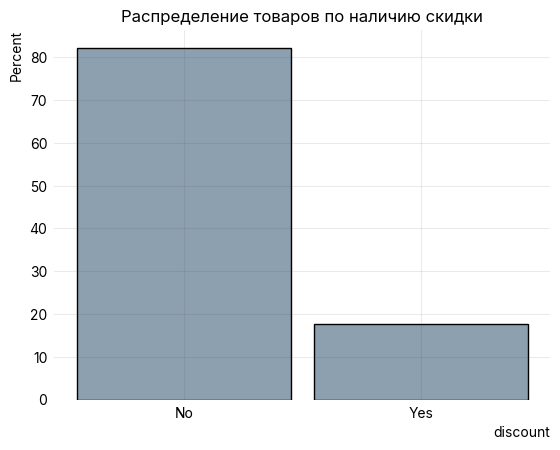

<Figure size 800x400 with 0 Axes>

In [79]:
plt.title('Распределение товаров по наличию скидки')
sns.histplot(data=df, x='discount', stat='percent', shrink=.9)
plt.figure(figsize=(8, 4))
plt.show()

Около 20% ассортимента представлено со скидками

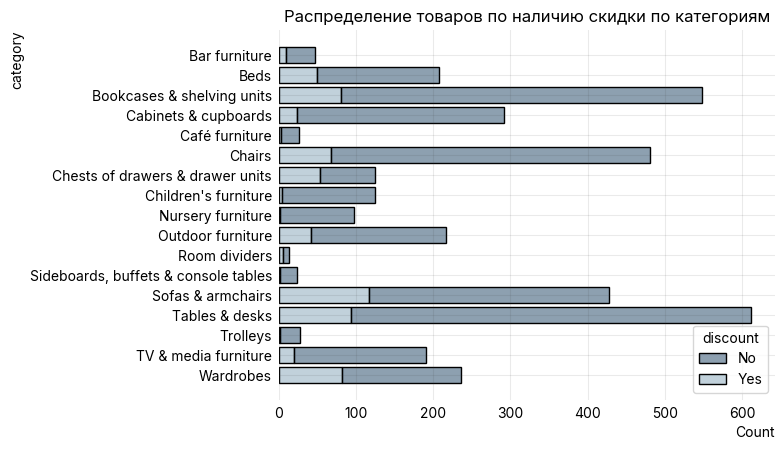

In [80]:
plt.title('Распределение товаров по наличию скидки по категориям')
sns.histplot(data=df, y='category', hue='discount', shrink=.8, stat='count', multiple="stack")
plt.show()

На диаграмме заметно, что в зависимости от категории, варьируется доля ассортимента со скидкой, есть так же ассортимент, с относительно небольшой матрицей, где скидок практически нет. 

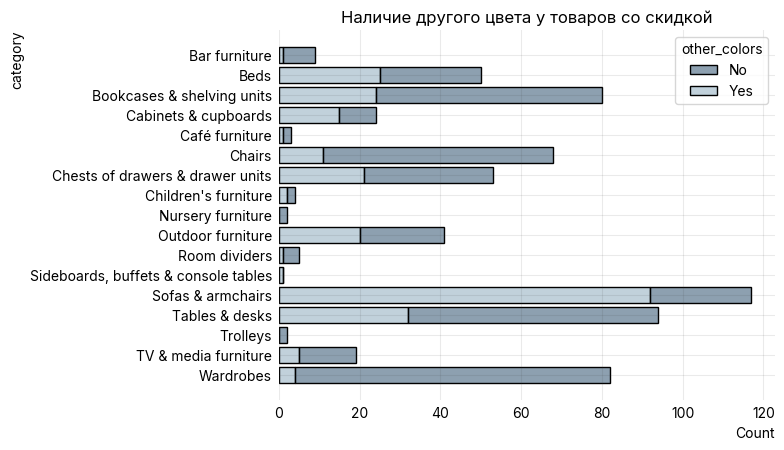

In [81]:
plt.title('Наличие другого цвета у товаров со скидкой')
sns.histplot(data=df[df['price_change, %'] != 0] , y='category', hue='other_colors', shrink=.8, stat='count',  multiple="stack")
plt.show()

Можно выделить, что например при выборе дивана со скидкой у большинства артикулов доступны дополнительные цвета, а так же, что гардеробы в основном представлены только в одном цвете. 

In [82]:
#Группировка товаров по категориям и агрегирование по среднему, максимальному и минимальному значению скидки
category_discount = df[df['price_change, %'] != 0].groupby('category').agg({'price_change, %': ['mean', 'max', 'min']})
category_discount

price_change, %             
                                                mean    max   min
category                                                         
Bar furniture                             -15.836667  -8.38 -40.0
Beds                                      -16.132667  -2.11 -40.0
Bookcases & shelving units                -18.425316  -0.15 -40.0
Cabinets & cupboards                      -19.237083  -3.00 -40.0
Café furniture                            -20.000000 -20.00 -20.0
Chairs                                    -17.086029  -0.38 -40.0
Chests of drawers & drawer units          -19.161887  -2.17 -30.0
Children's furniture                      -18.317500 -13.27 -20.0
Nursery furniture                         -20.000000 -20.00 -20.0
Outdoor furniture                         -25.233000  -8.77 -40.0
Room dividers                             -23.670000 -18.52 -40.0
Sideboards, buffets & console tables      -20.000000 -20.00 -20.0
Sofas & armchairs                         -19.810088  -1.36 -40.0
TV & media furniture                      -13.464737  -0.83 -40.0
Tables & desks                            -16.668085  -2.62 -40.0
Trolleys                                  -35.000000 -30.00 -40.0
Wardrobes                                 -18.111951  -0.17 -50.0

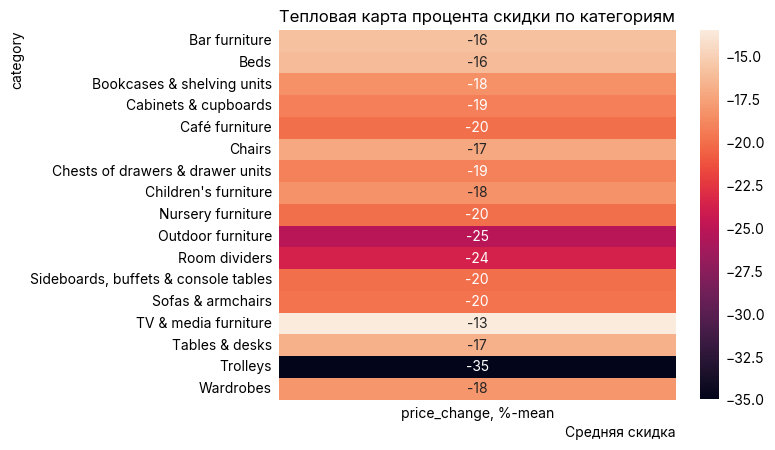

In [83]:
plt.title('Тепловая карта процента скидки по категориям')
sns.heatmap(category_discount.iloc[:, 0:1], annot=True)
plt.xlabel('Средняя скидка')
plt.show()

На тепловой карте видны средние скидки по категориям, благодаря чему мы видим, где показатель усредненный, а где максимальные (тележки) и минимальные значения (мебель для ТВ). 

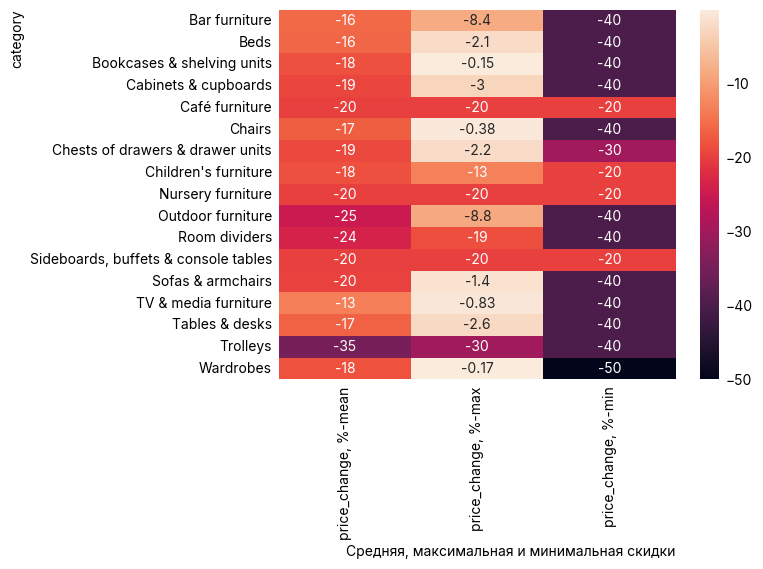

In [84]:
sns.heatmap(category_discount, annot=True)
plt.xlabel('Средняя, максимальная и минимальная скидки')
plt.show()

Так же тепловая карта, но с добавлением минимальных и максимальных скидок по категориям. 

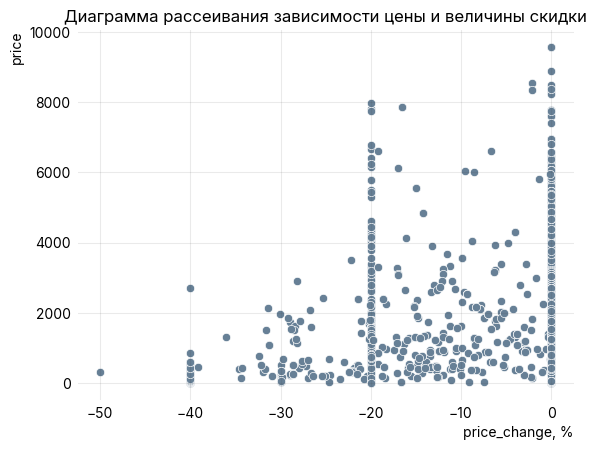

In [85]:
plt.title('Диаграмма рассеивания зависимости цены и величины скидки')
sns.scatterplot(data=df, y='price', x='price_change, %')
plt.show()

На графике видно, что большинство товаров имеют скидку 20%, а так же, чем выше цена, тем как правило ниже скидка. 

In [86]:
df[['item_id', 'name', 'category', 'price', 'old_price', 'price_change, %']].sort_values(by=['price_change, %']).iloc[:5,:]

,item_id,name,category,price,old_price,"price_change, %"
3502,80379620,HEMNES,Wardrobes,297.5,595.0,-50.0
2565,10052362,POÄNG,Sofas & armchairs,150.0,250.0,-40.0
321,70302283,BRUSALI,Bookcases & shelving units,237.0,395.0,-40.0
1399,50343331,VEBERÖD,Chairs,327.0,545.0,-40.0
3251,58487,FLYTTA,Trolleys,537.0,895.0,-40.0


Топ 5 товаров с максимальным процентом скидки. 